In [115]:
import sys, os
from configobj import ConfigObj
from math import sqrt
import numpy as np
from astropy.io import fits
from multicens import multiCens
import matplotlib.pyplot as plt

In [107]:
def distance(a,b):
    return sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [163]:
frames = []
directory = '/home/sharonye/DESI/lab_machine/trim/data'
for file in os.scandir(directory):
    if file.path.endswith('fiducials.conf'):
        frames.append(unpack_fiducial_conf(file.path))

xs = []
ys = []
for frame in frames:
    xs.append(frame[0][0])
    ys.append(frame[0][1])
print(xs)
print(ys)
print(np.std(xs), np.std(ys))
print(sqrt(np.std(xs) ** 2 + np.std(ys) ** 2))

[1356.9133713885124, 1356.9127451521724, 1356.923354995318, 1356.9062040231888, 1356.900410625757, 1356.9046743527583, 1356.8998326685926, 1356.8848509679274, 1356.9117277466155, 1356.9202633380967]
[1696.4935762959037, 1696.5113203611097, 1696.4816698263564, 1696.503719839208, 1696.453207279379, 1696.463560984641, 1696.4963116248184, 1696.4360496058366, 1696.5019224607693, 1696.5111265754313]
0.010607728235764358 0.024679341923308343
0.02686249832185006


In [155]:
def unpack_fiducial_conf(filename):
    config = ConfigObj(filename)
    fid_list = []
    for fid in config.values():
        fid_list.append([float(fid['x_coord']), float(fid['y_coord'])])
    return sorted(fid_list, key=lambda x: x[0])

fids = unpack_fiducial_conf('/home/sharonye/DESI/lab_machine/trim/data/241017_062755_fiducials.conf')
print(fids)

[[1356.9258284529265, 1696.4933960990677], [1368.3444915996772, 1676.222356100144], [1376.1602903785072, 1694.1642031191845], [1383.7966315404897, 1711.9299164162883]]


In [110]:
def camera_scale_from_fiducial(fiducials):
    dist_0_1 = distance(fiducials[0], fiducials[1]) # should be 1.2mm
    dist_0_3 = distance(fiducials[0], fiducials[3]) # should be 1.6mm
    dist_1_3 = distance(fiducials[1], fiducials[3]) # should be 2mm
    return np.mean([1200/dist_0_1, 1600/dist_0_3, 2000/dist_1_3])

camera_scale_from_fiducial(fids)

51.537526695440306

In [111]:
hdul = fits.open('/home/sharonye/DESI/lab_machine/trim/data/centroids_zwo_241015_052053.fits')
image = hdul[0].data
X, Y, peaks, FWHM, _ = multicens.multiCens(image, n_centroids_to_keep=17, verbose=False, write_fits=False, size_fitbox=7)

Edge hot spot


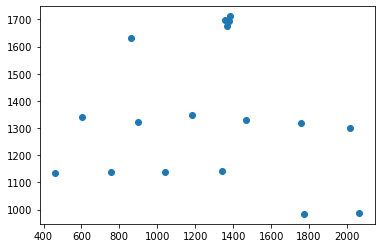

In [113]:
centroids = list(zip(X,Y))
pos_centroids = []
for centroid in centroids:
    if centroid[0] > 1330 and centroid[0] < 1400 and centroid[1] > 1660 and centroid[1] < 1730:
        pass
    else:
        pos_centroids.append(centroid)
plt.plot(X, Y, 'o')

In [151]:
def unpack_conf(filename):
    config = ConfigObj(filename)
    centroid_list = []
    for centroid in config.values():
        centroid_list.append([float(centroid['x_coord']), float(centroid['y_coord'])])
    return centroid_list

centroids_before = unpack_conf('/home/sharonye/DESI/lab_machine/trim/data/241017_062755_fiducials.conf')
centroids_after = unpack_conf('/home/sharonye/DESI/lab_machine/trim/data/241017_062821_fiducials.conf')

def find_moved(centroids_before, centroids_after):
    moved = []
    for after in centroids_after:
        #print('\n', after)
        match = False
        for before in centroids_before:
            #print(before)
            if distance(before, after) < .1:
                match = True
                break
        if not match:
            moved.append(after)
    return moved

print(find_moved(centroids_before, centroids_after))
# for centroid in centroids_before:
#     plt.plot(centroid[0], centroid[1], 'bo')
# for centroid in centroids_after:
#     plt.plot(centroid[0], centroid[1], 'ro')

[]
